In [3]:
from imblearn.under_sampling import TomekLinks, ClusterCentroids
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from collections import Counter
import imblearn
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Load the White Wine Dataset
df = pd.read_csv("./Downloads/winequality-white.csv")

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
#no missing data 
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

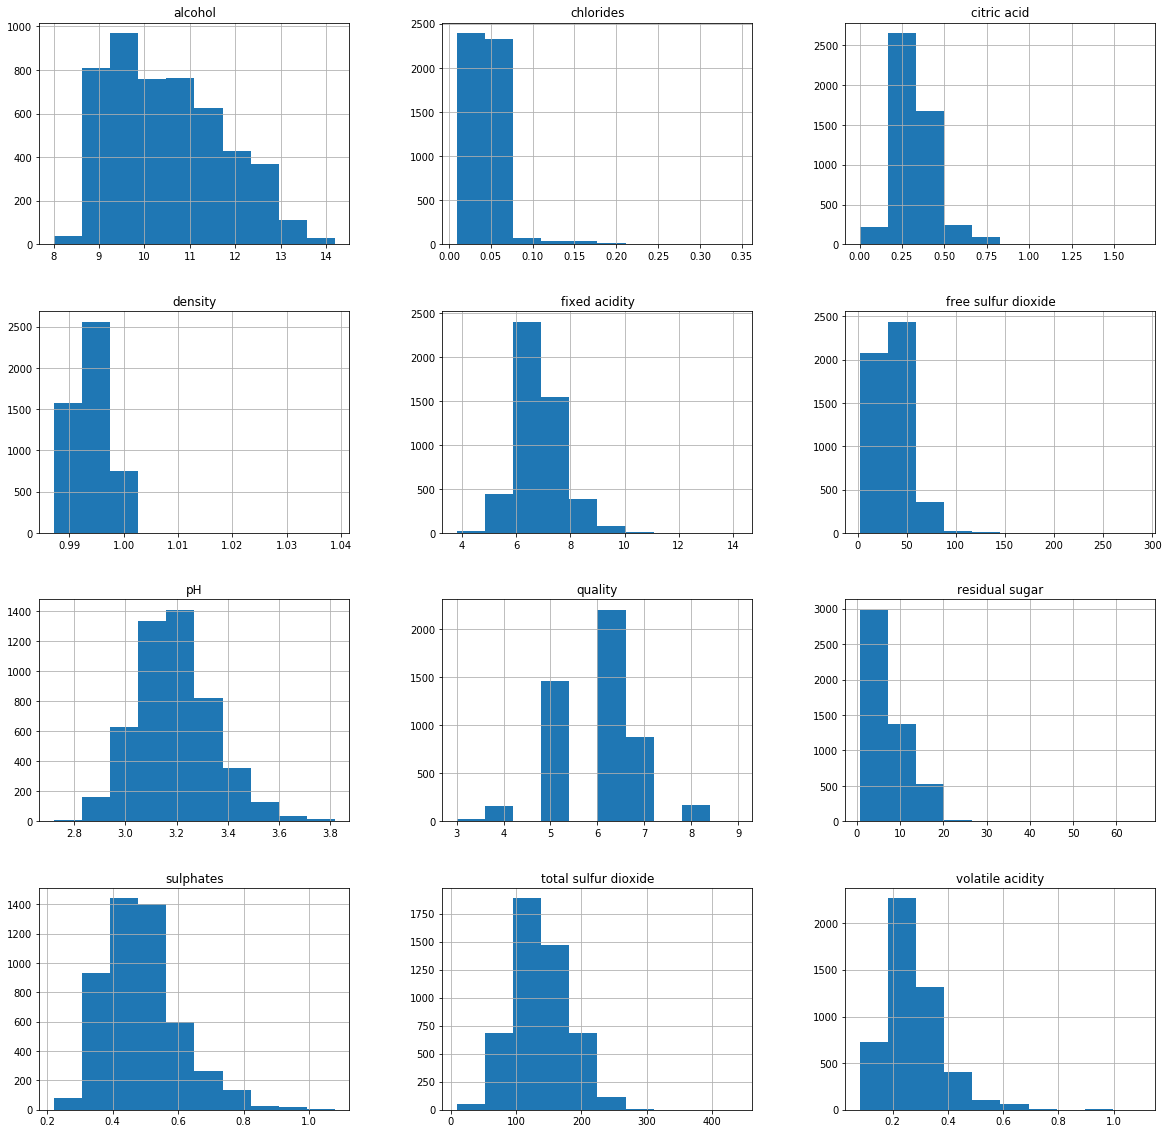

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df.hist(bins=10, figsize=(20,20))
plt.show()

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [11]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [13]:
def classify_wine_quality(quality):
    if quality < 6:
        return 'poor quality'
    elif quality == 6:
        return 'normal quality'
    else:
        return 'excellent quality'
    
df['quality classification'] = df['quality'].apply(classify_wine_quality)

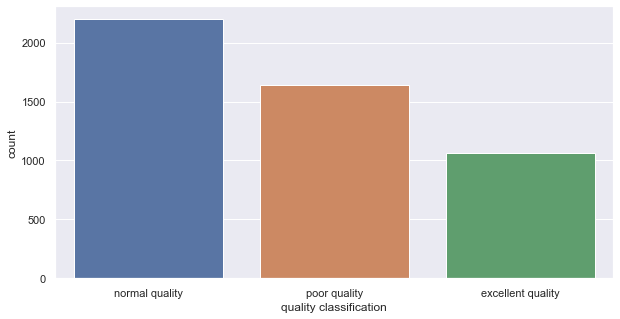

In [14]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='quality classification', data=df)

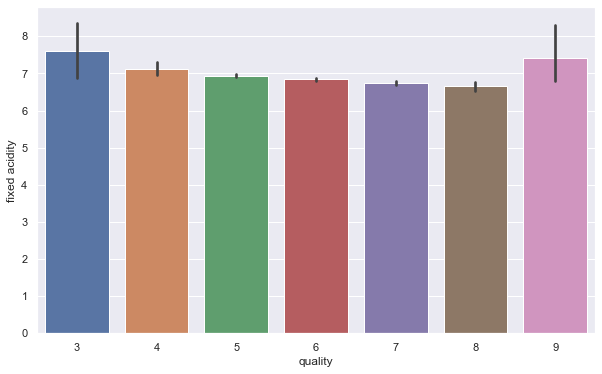

In [16]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

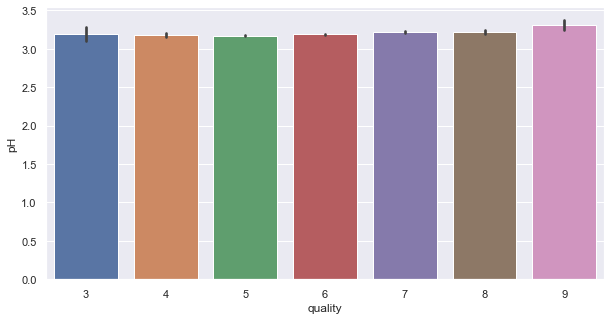

In [17]:
sns.barplot(x='quality', y='pH', data=df)

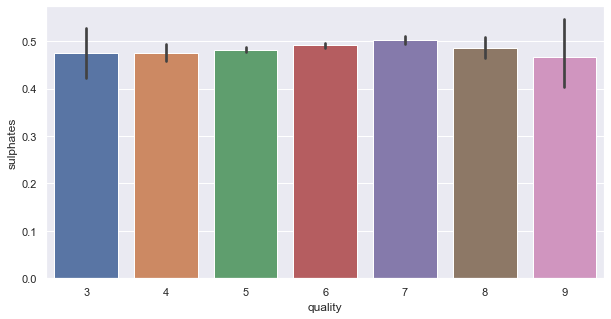

In [18]:
sns.barplot(x='quality', y='sulphates', data=df)

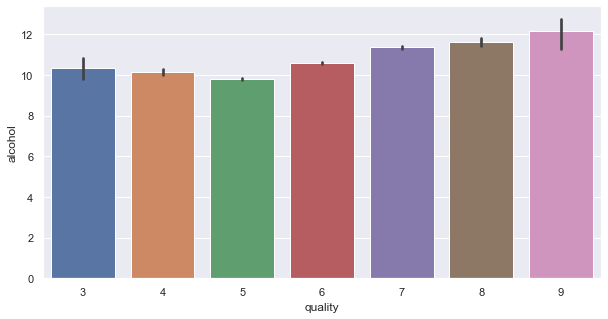

In [19]:
sns.barplot(x='quality', y='alcohol', data=df)

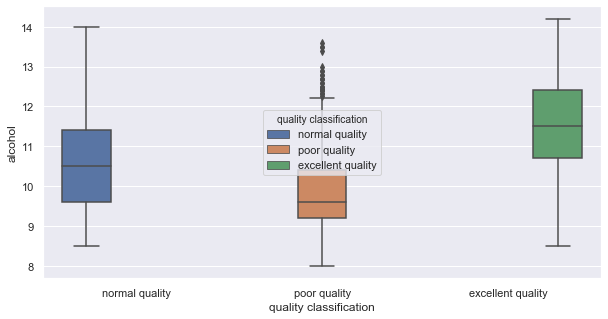

In [20]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(y='alcohol', x='quality classification', hue='quality classification', data=df)

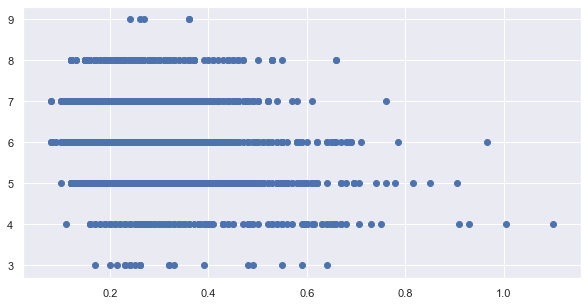

In [21]:
#plotting graph
plt.scatter(df['volatile acidity'], df['quality'])
plt.show()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

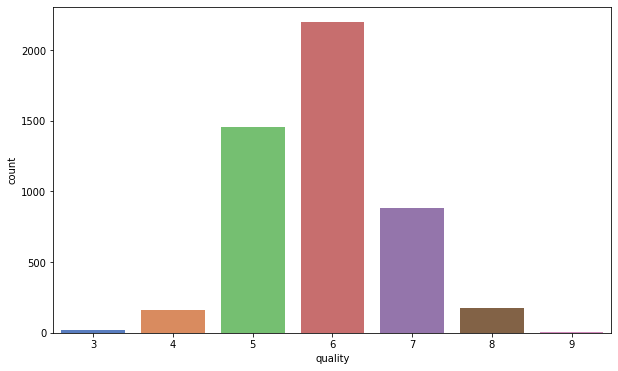

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(df["quality"], palette="muted")
df["quality"].value_counts()

In [8]:
quality = df["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Medium")

In [9]:
[(i, category.count(i)) for i in set(category)]

[('High', 1060), ('Medium', 3655), ('Low', 183)]

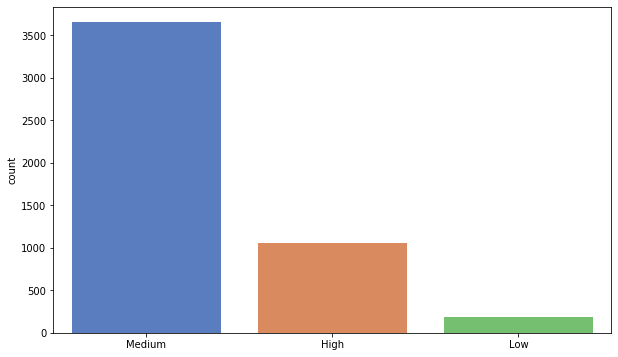

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(category, palette="muted")

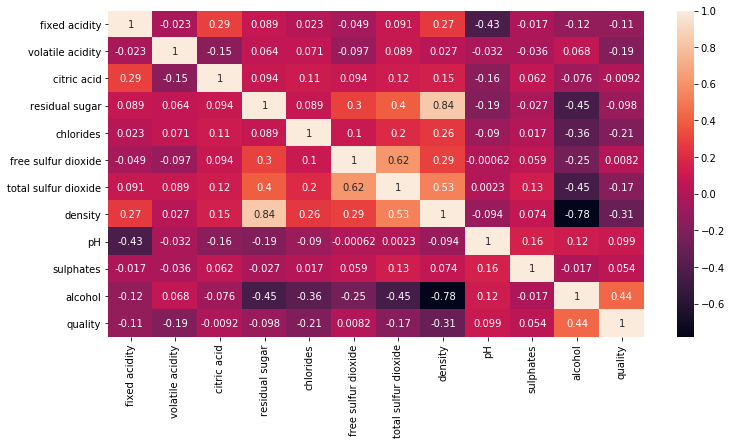

In [11]:

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)

In [12]:
quality = df["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Midium")
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([df, category], axis=1)
data.drop(columns="quality", axis=1, inplace=True)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [13]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2018)

# Random forest

In [15]:

clf = RandomForestClassifier(random_state=2018, oob_score=True)
param_dist = {"n_estimators": [50, 100, 150, 200, 250],
              'min_samples_leaf': [1, 2, 4]}
rfc_gs = GridSearchCV(clf, param_grid=param_dist, scoring='accuracy', cv=5)
rfc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=True, random_state=2018,
                                 

In [16]:
rfc_gs.best_score_

0.8392062188860219

# svm

In [17]:
# strtifiedKFold
skf = StratifiedKFold(n_splits=4)

In [18]:
pipe_svm = Pipeline([('clf', svm.SVC())])
grid_params = dict(clf__C=[0.1, 0.3, 1, 3, 10],
                   clf__gamma=[0.1, 0.3, 1, 3, 10],
                   clf__kernel=['rbf', 'sigmoid'])
gs_svm = GridSearchCV(estimator=pipe_svm,
                      param_grid=grid_params,
                      scoring='accuracy',
                      cv=skf)
gs_svm.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'clf__C': [0.1, 0.3, 1, 3, 10],
                 

In [19]:
print(gs_svm.best_score_)

0.8083211732088137


In [20]:
# just for comparision
pred_svm = gs_svm.predict(X_test)
print(classification_report(y_test, pred_svm))
print("The SVM model accuracy on Test data is %s" %
      accuracy_score(y_test, pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.34      0.51       209
           1       1.00      0.06      0.11        35
           2       0.81      1.00      0.90       736

    accuracy                           0.83       980
   macro avg       0.94      0.47      0.51       980
weighted avg       0.86      0.83      0.79       980

The SVM model accuracy on Test data is 0.826530612244898


In [21]:
# @hidden_cell
# relabel back : 0 means good, 1 for low, 2 for medium for better visualization
y_test_re = list(y_test)
for i in range(len(y_test_re)):
    if y_test_re[i] == 0:
        y_test_re[i] = "good"
    if y_test_re[i] == 1:
        y_test_re[i] = "low"
    if y_test_re[i] == 2:
        y_test_re[i] = "medium"
pred_svm_re = list(pred_svm)
for i in range(len(pred_svm_re)):
    if pred_svm_re[i] == 0:
        pred_svm_re[i] = "good"
    if pred_svm_re[i] == 1:
        pred_svm_re[i] = "low"
    if pred_svm_re[i] == 2:
        pred_svm_re[i] = "medium"
y_actu = pd.Series(y_test_re, name='Actual')
y_pred = pd.Series(pred_svm_re, name='Predicted')
svm_confusion = pd.crosstab(y_actu, y_pred)

In [22]:
svm_confusion

Predicted,good,low,medium
Actual,,,
good,72,0,137
low,0,2,33
medium,0,0,736


# Decision Tree

In [23]:
clf = Pipeline([
    ('scl', StandardScaler()),
    ('pca', PCA(random_state=42)),
    ('clf', DecisionTreeClassifier(random_state=42))])

criterion = ['gini', 'entropy']
splitter = ['best']
max_depth = [8, 9, 10, 11, 15, 20, 25]
min_samples_leaf = [2, 3, 5]
class_weight = ['balanced', None]

param_grid =\
    [{'clf__class_weight': class_weight,
      'clf__criterion': criterion,
      'clf__splitter': splitter,
      'clf__max_depth': max_depth,
      'clf__min_samples_leaf': min_samples_leaf
      }]

gs_dt = GridSearchCV(estimator=clf, param_grid=param_grid,
                     scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
gs_dt.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   21.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scl',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None, random_state=42,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                      

In [24]:
print(gs_dt.best_score_)

0.7677476737821565


# KNN

In [25]:
# knn with pca grid search
pipe_knn_pca = Pipeline([('pca', PCA()),
                         ('clf', KNeighborsClassifier())])
grid_params_knn_pca = \
    dict(pca__n_components=range(1, 11), clf__n_neighbors=range(1, 10))

gs_knn_pca = GridSearchCV(estimator=pipe_knn_pca,
                          param_grid=grid_params_knn_pca,
                          scoring='accuracy')

gs_knn_pca.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
               

In [26]:
print(gs_knn_pca.best_score_)

0.7524278676988037


# check its performance on test

In [27]:
# check its performance on test
pred_rfc = rfc_gs.predict(X_test)
print(classification_report(y_test, pred_rfc))
print("The RF model accuracy on Test data is %s" %
      accuracy_score(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.77      0.62      0.68       209
           1       0.57      0.11      0.19        35
           2       0.86      0.94      0.90       736

    accuracy                           0.84       980
   macro avg       0.73      0.56      0.59       980
weighted avg       0.83      0.84      0.83       980

The RF model accuracy on Test data is 0.8438775510204082


In [28]:
# @hidden_cell
# relabel back : 0 means good, 1 for low, 2 for medium for better visualization
y_test_re = list(y_test)
for i in range(len(y_test_re)):
    if y_test_re[i] == 0:
        y_test_re[i] = "good"
    if y_test_re[i] == 1:
        y_test_re[i] = "low"
    if y_test_re[i] == 2:
        y_test_re[i] = "medium"
pred_rfc_re = list(pred_rfc)
for i in range(len(pred_rfc_re)):
    if pred_rfc_re[i] == 0:
        pred_rfc_re[i] = "good"
    if pred_rfc_re[i] == 1:
        pred_rfc_re[i] = "low"
    if pred_rfc_re[i] == 2:
        pred_rfc_re[i] = "medium"
y_actu = pd.Series(y_test_re, name='Actual')
y_pred = pd.Series(pred_rfc_re, name='Predicted')
rfc_confusion = pd.crosstab(y_actu, y_pred)

In [29]:
rfc_confusion

Predicted,good,low,medium
Actual,,,
good,129,0,80
low,0,4,31
medium,39,3,694


In [34]:
#thanks